In [1]:
import pandas as pd
import datetime
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
data2019 = pd.read_csv('df_2019 2.csv')
data2018 = pd.read_csv('df_2018.csv')
data2017 = pd.read_csv('df_2017.csv')
data2016 = pd.read_csv('df_2016.csv')
data2015 = pd.read_csv('df_2015.csv')
data2014 = pd.read_csv('df_2014.csv')

/Users/davidsuffolk/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,4,15,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data2019.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [5]:
data2019 = data2019.drop(['Unnamed: 0','VendorID', 'RatecodeID', 'store_and_fwd_flag',
                         'PULocationID', 'DOLocationID', 'payment_type', 'extra'], axis=1)
data2019.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,7.0,0.5,1.65,0.0,0.3,9.95,NaN
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,14.0,0.5,1.00,0.0,0.3,16.30,NaN
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,4.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,3.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,52.0,0.5,0.00,0.0,0.3,55.55,NaN


In [6]:
columns = ['pickup_datetime','dropoff_datetime','passenger_count','trip_distance','fare_amount','surcharge',
          'mta_tax','tip_amount','tolls_amount','total_amount']
data2019 = data2019[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'fare_amount','improvement_surcharge','mta_tax','tip_amount','tolls_amount','total_amount']]
data2019.columns = columns
#data2018 = data2018.dropna()
data2019.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,7.0,0.3,0.5,1.65,0.0,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,14.0,0.3,0.5,1.00,0.0,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,4.5,0.3,0.5,0.00,0.0,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,3.5,0.3,0.5,0.00,0.0,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,52.0,0.3,0.5,0.00,0.0,55.55


In [7]:
data2018.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [8]:
data2018 = data2018.drop(['Unnamed: 0','VendorID', 'RatecodeID', 'store_and_fwd_flag',
                         'PULocationID', 'DOLocationID', 'payment_type', 'extra'], axis=1)
data2018.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,4.5,0.5,0.00,0.0,0.3,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,14.0,0.5,0.00,0.0,0.3,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,6.0,0.5,1.00,0.0,0.3,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,33.5,0.5,0.00,0.0,0.3,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,12.5,0.5,2.75,0.0,0.3,16.55


In [9]:
columns = ['pickup_datetime','dropoff_datetime','passenger_count','trip_distance','fare_amount','surcharge',
          'mta_tax','tip_amount','tolls_amount','total_amount']
data2018 = data2018[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'fare_amount','improvement_surcharge','mta_tax','tip_amount','tolls_amount','total_amount']]
data2018.columns = columns
#data2018 = data2018.dropna()
data2018.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,4.5,0.3,0.5,0.00,0.0,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,14.0,0.3,0.5,0.00,0.0,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,6.0,0.3,0.5,1.00,0.0,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,33.5,0.3,0.5,0.00,0.0,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,12.5,0.3,0.5,2.75,0.0,16.55


In [10]:
data2017.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [11]:
data2017 = data2017.drop(['Unnamed: 0','VendorID', 'RatecodeID', 'store_and_fwd_flag',
                         'PULocationID', 'DOLocationID', 'payment_type', 'extra'], axis=1)
data2017.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,12.5,0.5,2.00,0.0,0.3,15.30
1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,5.0,0.5,1.45,0.0,0.3,7.25
2,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,5.5,0.5,1.00,0.0,0.3,7.30
3,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,6.0,0.5,1.70,0.0,0.3,8.50
4,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,52.0,0.5,0.00,0.0,0.3,52.80


In [12]:
data2017 = data2017[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'fare_amount','improvement_surcharge','mta_tax','tip_amount','tolls_amount','total_amount']]
data2017.columns = columns
#data2017 = data2017.dropna()
data2017.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,12.5,0.3,0.5,2.00,0.0,15.30
1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,5.0,0.3,0.5,1.45,0.0,7.25
2,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,5.5,0.3,0.5,1.00,0.0,7.30
3,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,6.0,0.3,0.5,1.70,0.0,8.50
4,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,52.0,0.3,0.5,0.00,0.0,52.80


In [13]:
data2016.head()

,Unnamed: 0,DOLocationID,PULocationID,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,...,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,0,NaN,NaN,1,2,40.732407,-73.981842,0.5,7.5,0.3,...,2.0,40.734695,-73.990372,N,0.0,0.0,8.8,2016-01-01 00:00:00,2016-01-01 00:00:00,1.1
1,1,NaN,NaN,1,2,40.716679,-73.944473,0.5,18.0,0.3,...,1.0,40.729912,-73.980782,N,0.0,0.0,19.3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.9
2,2,NaN,NaN,1,2,40.788925,-73.950272,0.5,33.0,0.3,...,1.0,40.679565,-73.984550,N,0.0,0.0,34.3,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54
3,3,NaN,NaN,1,2,40.657333,-73.962242,0.0,16.5,0.3,...,2.0,40.718990,-73.993469,N,0.0,0.0,17.3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75
4,4,NaN,NaN,1,2,40.758514,-73.977264,0.0,8.0,0.3,...,2.0,40.781330,-73.960625,N,0.0,0.0,8.8,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76


In [14]:
data2016 = data2016.drop(['Unnamed: 0','VendorID', 'RatecodeID', 'store_and_fwd_flag',
                         'PULocationID', 'DOLocationID', 'payment_type', 'extra'], axis=1)
data2016.head()

,dropoff_latitude,dropoff_longitude,fare_amount,improvement_surcharge,mta_tax,passenger_count,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,40.732407,-73.981842,7.5,0.3,0.5,2,40.734695,-73.990372,0.0,0.0,8.8,2016-01-01 00:00:00,2016-01-01 00:00:00,1.1
1,40.716679,-73.944473,18.0,0.3,0.5,5,40.729912,-73.980782,0.0,0.0,19.3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.9
2,40.788925,-73.950272,33.0,0.3,0.5,1,40.679565,-73.984550,0.0,0.0,34.3,2016-01-01 00:00:00,2016-01-01 00:00:00,10.54
3,40.657333,-73.962242,16.5,0.3,0.5,1,40.718990,-73.993469,0.0,0.0,17.3,2016-01-01 00:00:00,2016-01-01 00:00:00,4.75
4,40.758514,-73.977264,8.0,0.3,0.5,3,40.781330,-73.960625,0.0,0.0,8.8,2016-01-01 00:00:00,2016-01-01 00:00:00,1.76


In [15]:
data2016 = data2016[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'fare_amount','improvement_surcharge','mta_tax','tip_amount','tolls_amount','total_amount']]
data2016.columns = columns
#data2016 = data2016.dropna()
data2016.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.1,7.5,0.3,0.5,0.0,0.0,8.8
1,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.9,18.0,0.3,0.5,0.0,0.0,19.3
2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,33.0,0.3,0.5,0.0,0.0,34.3
3,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,16.5,0.3,0.5,0.0,0.0,17.3
4,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,8.0,0.3,0.5,0.0,0.0,8.8


In [16]:
data2015.head()

,Unnamed: 0,RateCodeID,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,...,payment_type,pickup_latitude,pickup_longitude,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,0,1.0,NaN,2,40.750618,-73.974785,1.0,12.0,0.3,0.5,...,1,40.750111,-73.993896,N,3.25,0.0,17.05,2015-01-15 19:23:42,2015-01-15 19:05:39,1.59
1,1,1.0,NaN,1,40.759109,-73.994415,0.5,14.5,0.3,0.5,...,1,40.724243,-74.001648,N,2.00,0.0,17.80,2015-01-10 20:53:28,2015-01-10 20:33:38,3.30
2,2,1.0,NaN,1,40.824413,-73.951820,0.5,9.5,0.3,0.5,...,2,40.802788,-73.963341,N,0.00,0.0,10.80,2015-01-10 20:43:41,2015-01-10 20:33:38,1.80
3,3,1.0,NaN,1,40.719986,-74.004326,0.5,3.5,0.3,0.5,...,2,40.713818,-74.009087,N,0.00,0.0,4.80,2015-01-10 20:35:31,2015-01-10 20:33:39,0.50
4,4,1.0,NaN,1,40.742653,-74.004181,0.5,15.0,0.3,0.5,...,2,40.762428,-73.971176,N,0.00,0.0,16.30,2015-01-10 20:52:58,2015-01-10 20:33:39,3.00


In [17]:
data2015 = data2015.drop(['Unnamed: 0','VendorID', 'RatecodeID', 'store_and_fwd_flag',
                         'pickup_latitude','pickup_longitude', 'dropoff_latitude','dropoff_longitude', 
                          'payment_type', 'extra','RateCodeID'], axis=1)
data2015.head()

,fare_amount,improvement_surcharge,mta_tax,passenger_count,tip_amount,tolls_amount,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
0,12.0,0.3,0.5,1,3.25,0.0,17.05,2015-01-15 19:23:42,2015-01-15 19:05:39,1.59
1,14.5,0.3,0.5,1,2.00,0.0,17.80,2015-01-10 20:53:28,2015-01-10 20:33:38,3.30
2,9.5,0.3,0.5,1,0.00,0.0,10.80,2015-01-10 20:43:41,2015-01-10 20:33:38,1.80
3,3.5,0.3,0.5,1,0.00,0.0,4.80,2015-01-10 20:35:31,2015-01-10 20:33:39,0.50
4,15.0,0.3,0.5,1,0.00,0.0,16.30,2015-01-10 20:52:58,2015-01-10 20:33:39,3.00


In [18]:
data2015 = data2015[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance',
                   'fare_amount','improvement_surcharge','mta_tax','tip_amount','tolls_amount','total_amount']]
data2015.columns = columns
#data2015 = data2015.dropna()
data2015.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,12.0,0.3,0.5,3.25,0.0,17.05
1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,14.5,0.3,0.5,2.00,0.0,17.80
2,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,9.5,0.3,0.5,0.00,0.0,10.80
3,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,3.5,0.3,0.5,0.00,0.0,4.80
4,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,15.0,0.3,0.5,0.00,0.0,16.30


In [19]:
data2014.head()

,Unnamed: 0,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [20]:
data2014 = data2014.drop(['Unnamed: 0','vendor_id',' rate_code',' store_and_fwd_flag',' pickup_latitude',
                          ' dropoff_latitude',' dropoff_longitude',' payment_type',' pickup_longitude'], axis=1)
data2014.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75


In [21]:
data2014.columns = columns
#data2014 = data2014.dropna()
data2014.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75


In [22]:
frames = [data2014,data2015,data2016,data2017,data2018,data2019]

In [23]:
data = pd.concat(frames)

In [24]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75


In [25]:
data.describe()

,passenger_count,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,720000.000000,720000.000000,660000.000000,720000.000000,720000.000000,720000.000000,660000.000000
mean,1.585368,12.141152,0.297149,0.474660,1.729862,1.618311,16.827969
std,1.228635,11.620967,0.145150,0.372118,2.562750,8.350313,14.034823
min,0.000000,-400.000000,-0.300000,-0.500000,-2.340000,-28.500000,-400.300000
25%,1.000000,6.000000,0.300000,0.500000,0.000000,0.000000,8.800000
50%,1.000000,9.000000,0.300000,0.500000,1.080000,0.000000,12.500000
75%,2.000000,14.500000,0.300000,0.500000,2.360000,0.000000,19.120000
max,99.000000,1012.000000,2.500000,34.040000,320.000000,2791.570000,1013.300000


In [26]:
data['dropoff_datetime'] =  pd.to_datetime(data['dropoff_datetime'], errors='coerce')
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'], errors='coerce')

In [27]:
data['Pickup_Month'] = pd.DatetimeIndex(data['pickup_datetime']).month
data['Pickup_Day'] = pd.DatetimeIndex(data['pickup_datetime']).date
data['Pickup_Year'] = pd.DatetimeIndex(data['pickup_datetime']).year
data['Pickup_Time'] = pd.DatetimeIndex(data['pickup_datetime']).time
data['Dropoff_Month'] = pd.DatetimeIndex(data['dropoff_datetime']).month
data['Dropoff_Day'] = pd.DatetimeIndex(data['dropoff_datetime']).date
data['Dropoff_Year'] = pd.DatetimeIndex(data['dropoff_datetime']).year
data['Dropoff_Time'] = pd.DatetimeIndex(data['dropoff_datetime']).time

In [28]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Year,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90,1.0,2014-01-09,2014.0,20:45:25,1.0,2014-01-09,2014.0,20:52:31
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40,1.0,2014-01-09,2014.0,20:46:12,1.0,2014-01-09,2014.0,20:55:12
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00,1.0,2014-01-09,2014.0,20:44:47,1.0,2014-01-09,2014.0,20:59:46
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20,1.0,2014-01-09,2014.0,20:44:57,1.0,2014-01-09,2014.0,20:51:40
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75,1.0,2014-01-09,2014.0,20:47:09,1.0,2014-01-09,2014.0,20:53:32


In [29]:
data['diff_seconds'] = data['dropoff_datetime'] - data['pickup_datetime']
data['diff_seconds'] = data['diff_seconds']/np.timedelta64(1,'s')

In [30]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Year,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90,1.0,2014-01-09,2014.0,20:45:25,1.0,2014-01-09,2014.0,20:52:31,426.0
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40,1.0,2014-01-09,2014.0,20:46:12,1.0,2014-01-09,2014.0,20:55:12,540.0
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00,1.0,2014-01-09,2014.0,20:44:47,1.0,2014-01-09,2014.0,20:59:46,899.0
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20,1.0,2014-01-09,2014.0,20:44:57,1.0,2014-01-09,2014.0,20:51:40,403.0
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75,1.0,2014-01-09,2014.0,20:47:09,1.0,2014-01-09,2014.0,20:53:32,383.0


In [31]:
data['Pickup_Month'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [32]:
data['Pickup_Year'].unique()

array([2014., 2015., 2016.,   nan, 1970., 2017., 2018., 2008., 2019.])

In [33]:
data.groupby('Pickup_Year').count()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds
Pickup_Year,,,,,,,,,,,,,,,,,,
1970.0,54464,54464,54464,54464,54464,0,54464,54464,54464,0,54464,54464,54464,54464,54464,54464,54464,54464
2008.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2014.0,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
2015.0,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
2016.0,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
2017.0,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082
2018.0,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025
2019.0,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888


In [34]:
data1970 = data[data['Pickup_Year'] == 1970.0]
data1970

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Year,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds
65536,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000004,1,N,0.5,NaN,0.0,0.3,18.80,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,3.000000e-09
65537,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,1,N,0.5,NaN,0.0,0.3,5.76,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,-1.000000e-09
65538,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000001,1,N,0.5,NaN,0.0,0.3,8.30,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,-1.000000e-09
65539,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000003,1,N,0.5,NaN,0.0,0.3,16.55,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,0.000000e+00
65540,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,1,N,0.5,NaN,0.0,0.3,5.80,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,-1.000000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,1,N,0.5,NaN,0.0,0.3,12.95,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,0.000000e+00
119996,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000003,1,N,0.5,NaN,0.0,0.3,25.56,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,0.000000e+00
119997,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,1,N,0.5,NaN,0.0,0.3,8.16,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,-1.000000e-09
119998,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000001,1,N,0.5,NaN,0.0,0.3,8.30,NaN,1.0,1970-01-01,1970.0,00:00:00,1.0,1970-01-01,1970.0,00:00:00,-1.000000e-09


In [35]:
data = data[data['Pickup_Year'] != 1970.0]
data = data[data['Pickup_Year'] != 2008.0]

In [36]:
data.groupby('Pickup_Year').count()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds
Pickup_Year,,,,,,,,,,,,,,,,,,
2014.0,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
2015.0,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
2016.0,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
2017.0,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082,120082
2018.0,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025,120025
2019.0,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888,119888


In [37]:
data = data.dropna()

In [38]:
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Year,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6.5,0.5,0.5,1.40,0.0,8.90,1.0,2014-01-09,2014.0,20:45:25,1.0,2014-01-09,2014.0,20:52:31,426.0
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8.5,0.5,0.5,1.90,0.0,11.40,1.0,2014-01-09,2014.0,20:46:12,1.0,2014-01-09,2014.0,20:55:12,540.0
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11.5,0.5,0.5,1.50,0.0,14.00,1.0,2014-01-09,2014.0,20:44:47,1.0,2014-01-09,2014.0,20:59:46,899.0
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7.5,0.5,0.5,1.70,0.0,10.20,1.0,2014-01-09,2014.0,20:44:57,1.0,2014-01-09,2014.0,20:51:40,403.0
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6.0,0.5,0.5,1.75,0.0,8.75,1.0,2014-01-09,2014.0,20:47:09,1.0,2014-01-09,2014.0,20:53:32,383.0


In [39]:
data['trip_distance'] = pd.to_numeric(data['trip_distance'])

In [40]:
data = data[data['trip_distance'] != 284000.0]

In [41]:
data = data[data['total_amount'] > 0]

In [42]:
data = data[data['total_amount'] < 400]
data = data[data['trip_distance'] > 0.1]

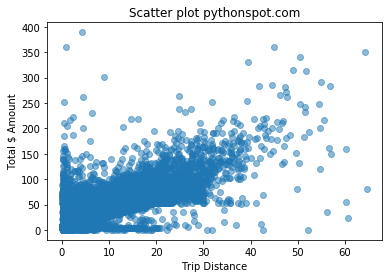

In [43]:
x = data['trip_distance']
y = data['total_amount']
#s = data_export['passenger_count']

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Trip Distance')
plt.ylabel('Total $ Amount')
plt.show()

In [44]:
data['tip_amount'] = data['tip_amount'].astype(int)
data['fare_amount'] = data['fare_amount'].astype(int)
data = data[data['tip_amount'] != 0]
data = data[data['fare_amount'] != 0]
z = [ row.tip_amount / row.fare_amount for index, row in data.iterrows() ]

In [45]:
data['tip_percentage'] = z
data = data[data['tip_percentage'] < 0.75]
data.head()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Day,Pickup_Year,Pickup_Time,Dropoff_Month,Dropoff_Day,Dropoff_Year,Dropoff_Time,diff_seconds,tip_percentage
0,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,6,0.5,0.5,1,0.0,8.90,1.0,2014-01-09,2014.0,20:45:25,1.0,2014-01-09,2014.0,20:52:31,426.0,0.166667
1,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,8,0.5,0.5,1,0.0,11.40,1.0,2014-01-09,2014.0,20:46:12,1.0,2014-01-09,2014.0,20:55:12,540.0,0.125000
2,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,11,0.5,0.5,1,0.0,14.00,1.0,2014-01-09,2014.0,20:44:47,1.0,2014-01-09,2014.0,20:59:46,899.0,0.090909
3,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,7,0.5,0.5,1,0.0,10.20,1.0,2014-01-09,2014.0,20:44:57,1.0,2014-01-09,2014.0,20:51:40,403.0,0.142857
4,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,6,0.5,0.5,1,0.0,8.75,1.0,2014-01-09,2014.0,20:47:09,1.0,2014-01-09,2014.0,20:53:32,383.0,0.166667


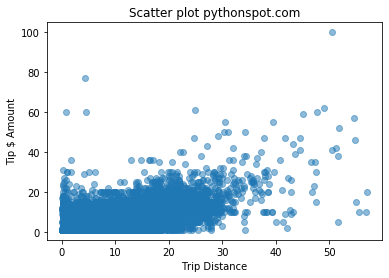

In [46]:
x = data['trip_distance']
y = data['tip_amount']
#s = data_export['passenger_count']

plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Trip Distance')
plt.ylabel('Tip $ Amount')
plt.show()

In [47]:
data.describe()

,passenger_count,trip_distance,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,Pickup_Month,Pickup_Year,Dropoff_Month,Dropoff_Year,diff_seconds,tip_percentage
count,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000,405917.000000
mean,1.614153,3.431791,13.350222,0.306137,0.498636,2.546713,0.304619,18.361282,6.201795,2016.545321,6.206749,2016.545444,907.351207,0.194274
std,1.245564,3.804928,10.961905,0.150933,0.026152,2.388294,1.386743,13.954548,3.519064,1.795272,3.519773,1.795384,2840.786724,0.069736
min,0.000000,0.110000,2.000000,0.000000,0.000000,1.000000,0.000000,4.300000,1.000000,2014.000000,1.000000,2014.000000,-4940.000000,0.010870
25%,1.000000,1.200000,7.000000,0.300000,0.500000,1.000000,0.000000,10.120000,3.000000,2015.000000,3.000000,2015.000000,416.000000,0.142857
50%,1.000000,2.100000,10.000000,0.300000,0.500000,2.000000,0.000000,13.800000,6.000000,2017.000000,6.000000,2017.000000,666.000000,0.200000
75%,2.000000,3.990000,16.000000,0.300000,0.500000,3.000000,0.000000,20.760000,9.000000,2018.000000,9.000000,2018.000000,1060.000000,0.222222
max,6.000000,56.930000,300.000000,2.000000,0.850000,100.000000,40.620000,389.120000,12.000000,2019.000000,12.000000,2019.000000,86370.000000,0.740741


In [48]:
data.to_csv('data04032020.csv')

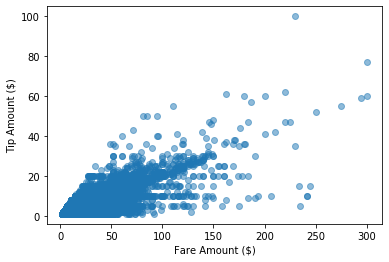

In [49]:
x = data['fare_amount']
y = data['tip_amount']
#s = data_export['passenger_count']

plt.scatter(x, y, alpha=0.5)
#plt.title('Scatter plot pythonspot.com')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.show()